In [8]:
from cellpose import models, io
import cellpose
import os
import numpy as np
from skimage.io import imread
from tnia.plotting.plt_helper import imshow_multi2d, random_label_cmap
from matplotlib import pyplot as plt
from tnia.deeplearning.dl_helper import quantile_normalization, get_label_paths

print(f"cellpose version {cellpose.version}")

cellpose version 3.1.1.1


In [9]:
parent_path =r'D:\images\tnia-python-images\\imagesc\\2024_10_11_tough_cellpose_3'
model_path = os.path.join(parent_path, 'models')
model_name = 'cellpose_for_protrusions_2'

model = models.CellposeModel(gpu=True, model_type=None, pretrained_model= os.path.join(model_path, model_name))

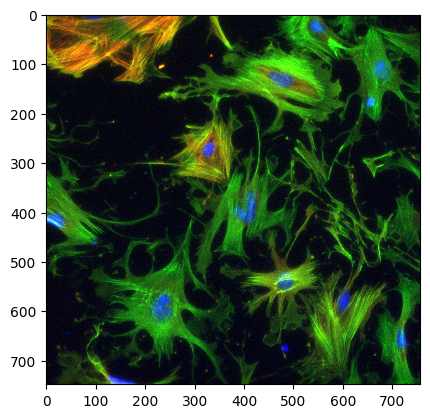

In [10]:
im_name = 'img52.tif'
im = imread(os.path.join(parent_path, im_name))
im = quantile_normalization(im, channels=True)
plt.imshow(im)

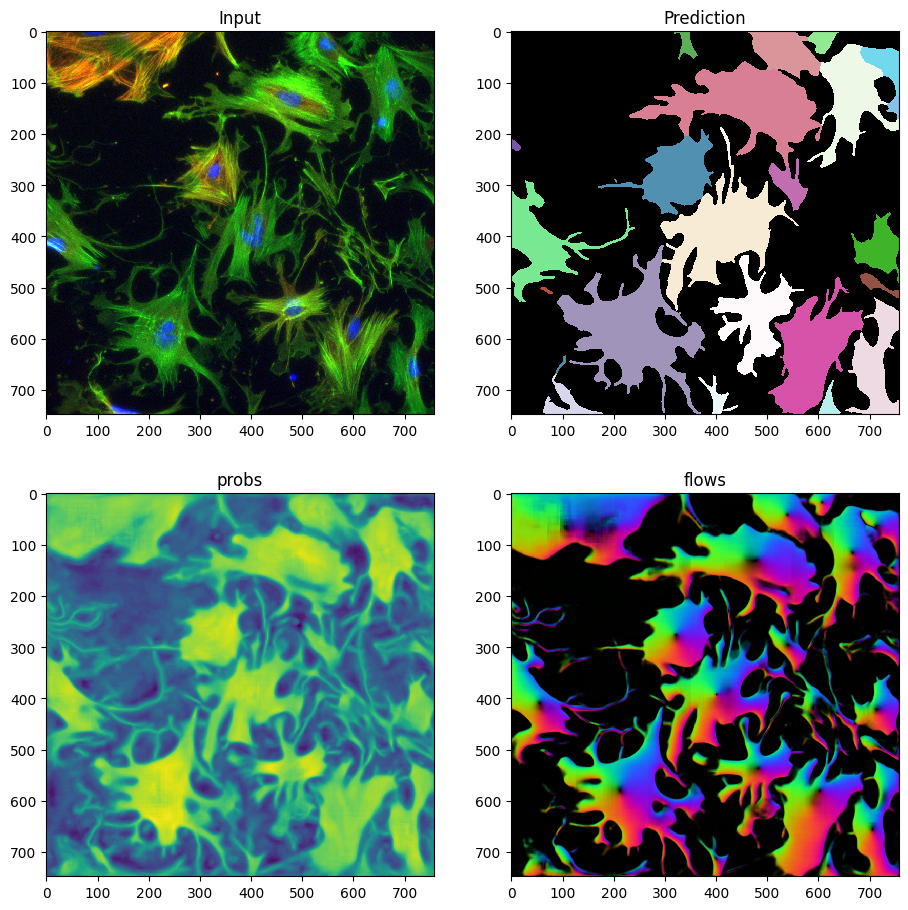

In [11]:
masks= model.eval(im, diameter=30, niter=20000, channels=[2,3], cellprob_threshold=-1.0, normalize=False)
colormaps = ['gray', random_label_cmap(), 'viridis', 'gray']
fig = imshow_multi2d([im, masks[0], masks[1][2], masks[1][0]], ['Input', 'Prediction', 'probs', 'flows'], 2, 2, colormaps=colormaps, width=11, height=11)

In [23]:
import napari

viewer = napari.Viewer()
viewer.add_image(im, 'image')
viewer.add_labels(masks[0], 'predicted labels')
viewer.add_image(masks[1][2], 'probs')
viewer.add_image(masks[1][0], 'flows')

<Image layer 'Image [1]' at 0x1630b176650>